In [16]:
import json
from sqlalchemy import create_engine
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
engine = create_engine('sqlite:///tab.db')
conn = engine.connect()
dfo = pd.read_sql_table('race', conn)
dfo.head()

,id,meeting_name,location,venue_mnemonic,race_type,meeting_date,race_number,race_name,race_start_time,race_status,race_distance,results_data,num_runners,runners_data
0,1,RICHMOND,NSW,C,G,2017-09-13,1,LADBROKES INFO HUB MDN HT1,2017-09-13 05:12:00,Paying,400,"[[4], [2], [1], [5]]",8,"[{""runnerName"": ""ZALI'S BLUEBOY"", ""runnerNumbe..."
1,2,RICHMOND,NSW,C,G,2017-09-13,2,KEVIN WATERS TOWING MDN HT2,2017-09-13 05:32:00,Paying,400,"[[1], [8], [7], [2]]",8,"[{""runnerName"": ""SKETCHY LINDA"", ""runnerNumber..."
2,3,RICHMOND,NSW,C,G,2017-09-13,4,PENRITHELECTRICAL.COM.AU STKS,2017-09-13 06:07:00,Paying,400,"[[9], [7], [8], [2]]",8,"[{""runnerName"": ""BROWZA BOB'"", ""runnerNumber"":..."
3,4,RICHMOND,NSW,C,G,2017-09-13,5,RICHMONDGREYHOUNDS.COM.AU STKS,2017-09-13 06:27:00,Paying,618,"[[6], [7], [3], [1]]",8,"[{""runnerName"": ""MIAMI DEMON"", ""runnerNumber"":..."
4,5,RICHMOND,NSW,C,G,2017-09-13,6,SWIFT FANCY @ STUD 1-2W STKS,2017-09-13 06:42:00,Paying,535,"[[6], [7], [1], [8]]",8,"[{""runnerName"": ""KILLING TIME"", ""runnerNumber""..."


In [6]:
dfo['results'] = dfo['results_data'].map(json.loads)
dfo['runners'] = dfo['runners_data'].map(json.loads)
dfo.head()

,id,meeting_name,location,venue_mnemonic,race_type,meeting_date,race_number,race_name,race_start_time,race_status,race_distance,results_data,num_runners,runners_data,results,runners
0,1,RICHMOND,NSW,C,G,2017-09-13,1,LADBROKES INFO HUB MDN HT1,2017-09-13 05:12:00,Paying,400,"[[4], [2], [1], [5]]",8,"[{""runnerName"": ""ZALI'S BLUEBOY"", ""runnerNumbe...","[[4], [2], [1], [5]]","[{'finishingPosition': 3, 'fixedOdds': {'propo..."
1,2,RICHMOND,NSW,C,G,2017-09-13,2,KEVIN WATERS TOWING MDN HT2,2017-09-13 05:32:00,Paying,400,"[[1], [8], [7], [2]]",8,"[{""runnerName"": ""SKETCHY LINDA"", ""runnerNumber...","[[1], [8], [7], [2]]","[{'finishingPosition': 0, 'fixedOdds': {'propo..."
2,3,RICHMOND,NSW,C,G,2017-09-13,4,PENRITHELECTRICAL.COM.AU STKS,2017-09-13 06:07:00,Paying,400,"[[9], [7], [8], [2]]",8,"[{""runnerName"": ""BROWZA BOB'"", ""runnerNumber"":...","[[9], [7], [8], [2]]","[{'finishingPosition': 1, 'fixedOdds': {'propo..."
3,4,RICHMOND,NSW,C,G,2017-09-13,5,RICHMONDGREYHOUNDS.COM.AU STKS,2017-09-13 06:27:00,Paying,618,"[[6], [7], [3], [1]]",8,"[{""runnerName"": ""MIAMI DEMON"", ""runnerNumber"":...","[[6], [7], [3], [1]]","[{'finishingPosition': 0, 'fixedOdds': {'propo..."
4,5,RICHMOND,NSW,C,G,2017-09-13,6,SWIFT FANCY @ STUD 1-2W STKS,2017-09-13 06:42:00,Paying,535,"[[6], [7], [1], [8]]",8,"[{""runnerName"": ""KILLING TIME"", ""runnerNumber""...","[[6], [7], [1], [8]]","[{'finishingPosition': 0, 'fixedOdds': {'propo..."


In [48]:
data = pd.DataFrame()
for row in dfo['runners']:
    data = data.append(row)
data.head()

,barrierNumber,claimAmount,finishingPosition,fixedOdds,odds_best,odds_perc,odds_scaled,parimutuel,prediction,probability,riderDriverName,runnerName,runnerNumber,trainerName
0,1,0.0,3,"{'propositionNumber': 151981, 'returnWinOpen':...",6.0,0.166667,0.140341,"{'returnWin': 5.1, 'returnPlace': 1.4, 'bettin...",2.509228e-01,1.313093e-01,,ZALI'S BLUEBOY,1,BRAD PEARCE
1,2,0.0,2,"{'propositionNumber': 151982, 'returnWinOpen':...",2.8,0.357143,0.300730,"{'returnWin': 2.7, 'returnPlace': 1.1, 'bettin...",6.210967e-01,3.250234e-01,,OVER WATCH,2,MATHEW EGGE
2,3,0.0,0,"{'propositionNumber': 151983, 'returnWinOpen':...",21.0,0.047619,0.040097,"{'returnWin': 28.5, 'returnPlace': 6.9, 'betti...",3.543074e-02,1.854111e-02,,STATION GIRL,3,DANIEL MCDONALD
3,4,0.0,1,"{'propositionNumber': 151984, 'returnWinOpen':...",34.0,0.029412,0.024766,"{'returnWin': 16.7, 'returnPlace': 3.4, 'betti...",1.055459e-26,5.523279e-27,,SANYA BAY,4,PAUL BOYD
4,5,0.0,4,"{'propositionNumber': 151985, 'returnWinOpen':...",19.0,0.052632,0.044318,"{'returnWin': 17.5, 'returnPlace': 5.6, 'betti...",3.640473e-02,1.905080e-02,,FIRE IMAGE,5,PERCY GORDON


In [49]:
# set losers with 0 to 5
data.loc[data['finishingPosition'] == 0, 'finishingPosition'] = 5

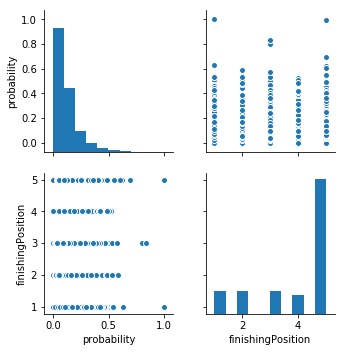

In [50]:
sns.pairplot(data, vars=['probability', 'finishingPosition'])

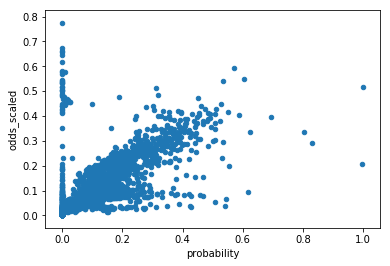

In [51]:
data.plot.scatter(x='probability', y='odds_scaled')

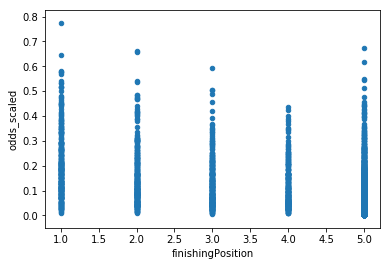

In [52]:
data.plot.scatter(x='finishingPosition', y='odds_scaled')

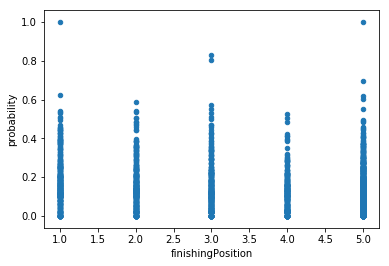

In [53]:
data.plot.scatter(x='finishingPosition', y='probability')

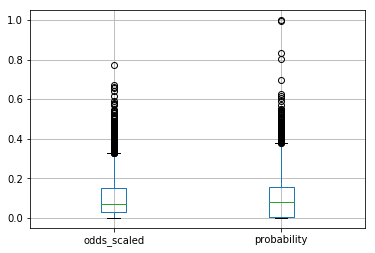

In [54]:
data.boxplot(column=['odds_scaled', 'probability'])

In [56]:
df_high = data[(data.odds_scaled > 0.7)]
df_high

,barrierNumber,claimAmount,finishingPosition,fixedOdds,odds_best,odds_perc,odds_scaled,parimutuel,prediction,probability,riderDriverName,runnerName,runnerNumber,trainerName
8,3,0.0,1,"{'propositionNumber': 151153, 'returnWinOpen':...",1.08,0.925926,0.774723,"{'returnWin': 1.1, 'returnPlace': 1.1, 'bettin...",5.889542e-15,3.463263e-14,,BIG FLOOD,3,SEONA THOMPSON
